In [ ]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1KgGBFb-Tb1e3mGycO4KFwPtCmk3Us4Fg'),None,False)
df = pd.read_excel(file_name)
df

Downloading...
From: https://drive.google.com/uc?id=1KgGBFb-Tb1e3mGycO4KFwPtCmk3Us4Fg
To: /content/Reestr-ZZ-na-18.05.2021.xlsx
100%|██████████| 17.4M/17.4M [00:00<00:00, 108MB/s] 


,Корректировка реестра,Unnamed: 1,Предприятие,Лицензионный участок,Unnamed: 4,Вид приоритетного загрязняющего вещества,Регистрационный номер загрязненного участка (предприятия),Регистрационный номер загрязненного участка в Реестре,Старые регистрационные номера (примечание),Местоположение загрязненного участка,Административный район,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Дата факта последнего разлива,Акт технического расследования,Unnamed: 16,Категория земель до загрязнения,Наличие специальных защитных зон,"Площадь загрязненного участка, га","Уровень загрязнения почв и земель нефтью, нефтепродуктами, мг/кг","Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг; уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм",Год планируемой рекультивации,Unnamed: 23,Результаты освидетельствования,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Решение об исключении,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,NaN,Название,Номер,NaN,NaN,NaN,NaN,NaN,NaN,Долгота,Широта,NaN,NaN,Номер,Дата,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Площадь,NaN,Акт осмотра,NaN,Заключение Территориального подразделения,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,2,3,4,5,6,NaN,7,8,9,10,11,12,13,14,15,16,NaN,18,19,20,NaN,Результаты освидетельствования,освидетельствовано,Дата,№,Дата,№,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,394 Т,ЛУК-2016-6,NaN,Район КП №186 (15м от дороги),Сургутский,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.1703,"48300,0",нет,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,395 Т,ЛУК-2016-7,NaN,Район КП №186 (30м от дороги),Сургутский,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.2595,"42300,0",нет,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,433Т,ЛУК-КГ-2018-1,NaN,т.вр.251А-т.вр.250А,Сургутский,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,1905-07-10 00:00:00,отсутствует,2018 (при осмотре,земли лесного фонда,нет,0.1559,"40600,0",нет,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(axis=1,how="all",thresh=3,inplace=True)
df.dropna(axis=0,how="all",thresh=10,inplace=True)

In [ ]:
df

,Корректировка реестра,Unnamed: 1,Предприятие,Лицензионный участок,Unnamed: 4,Вид приоритетного загрязняющего вещества,Регистрационный номер загрязненного участка (предприятия),Регистрационный номер загрязненного участка в Реестре,Старые регистрационные номера (примечание),Местоположение загрязненного участка,Административный район,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Дата факта последнего разлива,Акт технического расследования,Unnamed: 16,Категория земель до загрязнения,Наличие специальных защитных зон,"Площадь загрязненного участка, га","Уровень загрязнения почв и земель нефтью, нефтепродуктами, мг/кг","Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг; уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм",Год планируемой рекультивации
1,NaN,NaN,1,2,3,4,5,6,NaN,7,8,9,10,11,12,13,14,15,16,NaN,18,19,20
2,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,394 Т,ЛУК-2016-6,NaN,Район КП №186 (15м от дороги),Сургутский,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.1703,"48300,0",нет,2020
3,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,395 Т,ЛУК-2016-7,NaN,Район КП №186 (30м от дороги),Сургутский,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.2595,"42300,0",нет,2020
4,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,433Т,ЛУК-КГ-2018-1,NaN,т.вр.251А-т.вр.250А,Сургутский,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,1905-07-10 00:00:00,отсутствует,2018 (при осмотре,земли лесного фонда,нет,0.1559,"40600,0",нет,2021
5,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,492Т,ЛУК-КГ-2020-1,NaN,"""т.п.3-т.вр.1"" Ц-6 Т",Сургутский,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,2019,отсутствует,2019(выявлено при осмотре),земли лесного фонда,нет,0.0100,"48300,0",нет,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,NaN,NaN,"ООО ""Тарховское""",Ершовый,ХМН14654НЭ,подтоварная вода,Е -2020/3,ПП-2020-3,NaN,р-он поворота на АБК Ершового лу (н/с Гор.Пере...,Нижневартовский,77.7429,61.1666,2021-02-18 00:00:00,**,3,2020-11-23 00:00:00,"земли лесного фонда, земли промышленности",-,0.0983,умеренное,0,2021
12029,NaN,NaN,"ООО ""Тарховское""",Восточно-Ершовый,ХМН03083НП,нефть,02Е/18,ПП-2018-2,NaN,н.п. к.1-вр.в н/с к.82В,Нижневартовский,77.8856,61.3101,2019-03-29 00:00:00,2018-02-28 00:00:00,2,2018-02-28 00:00:00,земли лесного фонда,-,0.0001,низкий,0,2020
12031,NaN,NaN,"ООО ""Тарховское""",Туль-Еганский,ХМН14659НЭ,нефть,4,ПП-2013-207,NaN,Район скв.21,Нижневартовский,77.8659,61.3555,2014-02-15 00:00:00,нет данных,нет данных,нет данных,земли лесного фонда,NaN,0.1541,умеренное,0,2020
12036,NaN,NaN,ООО «Руфьеганнефтегаз»,Мыхлорский,ХМН 02640 НЭ,нефтепродукты,1-Р/2020,РУФ-2020-1,NaN,Н/пр. от задвижки №2 Руф. м/р до задвижки №3 М...,Нижневартовский,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,18.03.2020,1,2020-03-19 00:00:00,земли лесного фонда,-,0.0200,>100000,-,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 1 to 12051
Data columns (total 23 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   Корректировка реестра                                                                                                                                            884 non-null    object 
 1   Unnamed: 1                                                                                                                                                       0 non-null      object 
 2   Предприятие                                                                                                                   

In [ ]:
df['Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг;  уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм'].value_counts()

вне акватоий                   5194
-                              4912
вне акваторий                   774
0                               639
 -                              192
нет                              18
не попадало в водный объект       7
 -                                3
_                                 2
19                                1
9                                 1
7                                 1
4                                 1
1                                 1
Name: Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг;  уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм, dtype: int64

In [ ]:
df['Координаты загрязненного участка (в географической системе координат)'].value_counts()


72° 49' 7''           11
71° 59' 17''           8
72° 36' 36''           8
72° 55' 30''           8
72° 58' 26''           8
                      ..
72.6492                1
76.583884              1
76.8750635706          1
76.371682              1
66° 32' 28.559868"     1
Name: Координаты загрязненного участка (в географической системе координат), Length: 10373, dtype: int64

In [ ]:
df['Unnamed: 12'].value_counts()

60° 33' 32''    15
60° 40' 31''    13
60° 43' 16''    12
60° 47' 38''    11
60° 46' 4''     10
                ..
61.140836777     1
60.54717         1
61.160878        1
61° 4' 15''      1
61.030338        1
Name: Unnamed: 12, Length: 9842, dtype: int64

In [ ]:
df['Местоположение загрязненного участка'].value_counts()

рай-н ДНС26                                  93
К-2099                                       52
рай-н ОПБ                                    19
т.56 - т.58                                  18
уз.9 - уз.13                                 15
                                             ..
к.203-уз.34                                   1
т.15-т.13 (800 м. от т.13 в сторону с.15)     1
т.33 - к.66а  (КНС-59) (700м от т.33)         1
 К.У.р-н фед. а\дороги - ДНС-1К               1
60м северо-западнее К34                       1
Name: Местоположение загрязненного участка, Length: 9069, dtype: int64

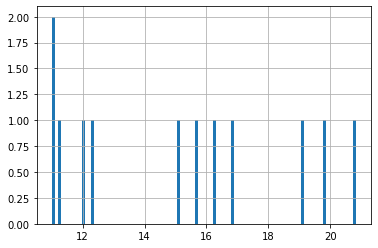

In [ ]:
df.loc[df['Площадь загрязненного участка, га']>10,'Площадь загрязненного участка, га'].hist(bins=100); 

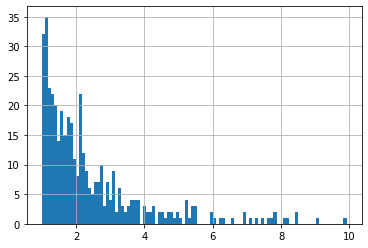

In [ ]:
df.loc[(df['Площадь загрязненного участка, га']>1) & (df['Площадь загрязненного участка, га']<=10),'Площадь загрязненного участка, га'].hist(bins=100); 

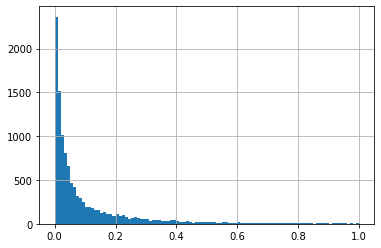

In [ ]:
df.loc[df['Площадь загрязненного участка, га']<=1,'Площадь загрязненного участка, га'].hist(bins=100); 

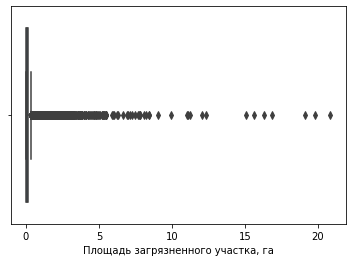

In [ ]:
sns.boxplot(x='Площадь загрязненного участка, га', data=df);

In [ ]:
df.loc[(df['Площадь загрязненного участка, га']>0.0001),'Вид приоритетного загрязняющего вещества'].value_counts()

нефтесодержащая жидкость      3904
ВНЭ                           3040
подтоварная вода              2522
нефть                          889
нефтяная эмульсия              687
нефтепродукты                  466
Нефть                           90
газовый конденсат               51
газовая смесь                   31
вмж                             16
нефть, нефтепродукты            12
Нефть, нефтепродукты            10
Подтоварная вода                 8
газоводонефтяная эмульсия        4
водонефтяная эмульсия            2
Вода подтоварная                 1
Нефтяная эмульсия                1
вода промысловая сточная         1
нефтегазожидкостная смесь        1
Name: Вид приоритетного загрязняющего вещества, dtype: int64

In [ ]:
df['Категория земель до загрязнения'].value_counts()

земли лесного фонда                                                                     4071
земли лесного фонда в долгосрочной аренде                                               3382
земли лесного фонда                                                                     1562
земли промышленности                                                                     669
земли промышленности; земли лесного фонда                                                410
                                                                                        ... 
земли запаса; земли лесного фонда                                                          1
земли населенных пунктов; земли лесного фонда                                              1
земли промышленности, земли лесного фонда в долгосрочной аренде, земли лесного фонда       1
Земли населенных пунктов; земли лесного фонда                                              1
15                                                                    

In [ ]:
columns = ['Вид приоритетного загрязняющего вещества','Координаты загрязненного участка (в географической системе координат)','Unnamed: 12','Дата регистрации в Реестре','Категория земель до загрязнения','Площадь загрязненного участка, га']
df_clean = df[columns]
df_clean.drop(index=1,inplace=True)
df_clean.reset_index(drop=True,inplace=True)
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Вид приоритетного загрязняющего вещества,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Категория земель до загрязнения,"Площадь загрязненного участка, га"
0,нефть,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,"73°59'00,23""","62°07'45,67""",2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.1666,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.3101,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.3555,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
columns = df_clean.columns
new_columns = {
    columns[0]:'cat_pollution',
    columns[1]:'lat',
    columns[2]:'lon',
    columns[3]:'date',
    columns[4]:'cat_ground',
    columns[5]:'square',
}
new_columns

{'Unnamed: 12': 'lon',
 'Вид приоритетного загрязняющего вещества': 'cat_pollution',
 'Дата регистрации в Реестре': 'date',
 'Категория земель до загрязнения': 'cat_ground',
 'Координаты загрязненного участка (в географической системе координат)': 'lat',
 'Площадь загрязненного участка, га': 'square'}

In [ ]:
df_clean = df_clean.rename(columns=new_columns)
df_clean

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,"73°59'00,23""","62°07'45,67""",2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.1666,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.3101,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.3555,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
def dms2dec(val):
    if (type(val)==str):
        val = val.strip()
        val = val.replace(',','.')
        dec = re.findall(r'\d+\.*\d*', val)
        try:
            if len(dec)==3:
                ret = int(dec[0]) + int(dec[1])/60 + float(dec[2])/3600
            elif len(dec)==2:
                ret = int(dec[0]) + float(dec[1])/60
            else:
                ret = float(val)
        except:
            print(val)
            ret = val
    else:
        ret = val
    return ret

In [ ]:
dms2dec(df_clean.loc[4,'lat'])

73.98339722222222

In [ ]:
df_clean.lat = df_clean.lat.apply(dms2dec)

66° 28' 41.857608 66° 28' 38.067024
66°34'32.52"3708
62° 22' 43"3904
77 0  34/ 66.8//
77 0  39/ 46.8//
71.983447 ’


In [ ]:
df_clean.lon = df_clean.lon.apply(dms2dec)

62.083820*
60. 50520
60. 51870
61. 01022
61° 48' 59.835852 61° 48' 58.708512
62 0 04 / 41.6//
62 0 06 / 37.9//
60.492743’


In [ ]:
df_clean.loc[df_clean.lat == "66° 28' 41.857608 66° 28' 38.067024",'lat'] = "66° 28' 41.857608"
df_clean.loc[df_clean.lat == "66°34'32.52\"3708",'lat'] = "66°34'32.52"
df_clean.loc[df_clean.lat == "62° 22' 43\"3904",'lat'] = "62° 22' 43"
df_clean.loc[df_clean.lat == "77 0  34/ 66.8//",'lat'] = "77° 34' 66.8"
df_clean.loc[df_clean.lat == "77 0  39/ 46.8//",'lat'] = "77° 39' 46.8"
df_clean.loc[df_clean.lat == "71.983447 ’",'lat'] = "71.983447"

df_clean.loc[df_clean.lon == "62.083820*",'lon'] = "62.083820"
df_clean.loc[df_clean.lon == "60. 50520",'lon'] = "60.50520"
df_clean.loc[df_clean.lon == "60. 51870",'lon'] = "60.51870"
df_clean.loc[df_clean.lon == "61. 01022",'lon'] = "61.01022"
df_clean.loc[df_clean.lon == "61° 48' 59.835852 61° 48' 58.708512",'lon'] = "61° 48' 59.835852"
df_clean.loc[df_clean.lon == "62 0 04 / 41.6//",'lon'] = "62° 04' 41.6"
df_clean.loc[df_clean.lon == "62 0 06 / 37.9//",'lon'] = "62° 06' 37.9"
df_clean.loc[df_clean.lon == "60.492743’",'lon'] = "60.492743"

In [ ]:
df_clean.lat = df_clean.lat.apply(dms2dec)

In [ ]:
df_clean.lon = df_clean.lon.apply(dms2dec)

In [ ]:
df_clean

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,73.5068,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,73.5082,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,73.3478,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,73.5475,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,73.9834,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.166608,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.310111,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.355532,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,77.5393,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
df_clean.to_csv('clean_pollution.csv')

#Снимки

In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH'),None,False)

Downloading...
From: https://drive.google.com/uc?id=1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH
To: /content/2021-01.zip
100%|██████████| 641M/641M [00:03<00:00, 172MB/s]


In [ ]:
!unzip {file_name}

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLD.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLM.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLP.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/IS_DATA.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/SCL.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/SNW.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/meta_info.pkl.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/timestamp.pkl.gz  
   creating: 2021-01/РН-ВНГ-2017-7/
 extracting: 2021-01/РН-ВНГ-2017-7/bbox.pkl.gz  
   creating: 2021-01/РН-ВНГ-2017-7/data/
 extracting: 2021-01/РН-ВНГ-2017-7/data/L2A.npy.gz  
   creating: 2021-01/РН-ВНГ-2017-7/mask/
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLD.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLM.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLP.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/IS_DATA.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/SCL.npy.gz  
 extracting: 

In [ ]:
!find . -type f -name '*.gz' -exec gunzip {} +


gzip: ./2021-01/ПП-2013-198/mask/SNW.npy.gz: unexpected end of file


In [ ]:
dt = np.load('/content/2021-01/ГПН-2013-1/data/L2A.npy')
print(dt.shape)

(19, 64, 64, 13)


In [ ]:
CLD = np.load('/content/2021-01/ГПН-2013-1/mask/CLD.npy')
print(CLD.shape)

(19, 64, 64, 1)


0 0
1 0
2 0
3 0
4 0
5 0
6 11866
7 6472
8 3191
9 608
10 372
11 2051
12 43136
13 334
14 464
15 746
16 3549
17 5680
18 0


In [ ]:
CLM = np.load('/content/2021-01/ГПН-2013-1/mask/CLM.npy')
print(CLM.shape)

(19, 64, 64, 1)


0 0


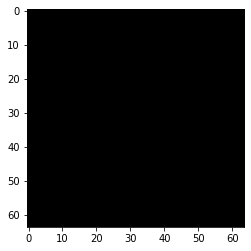

1 0


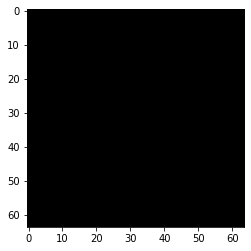

2 0


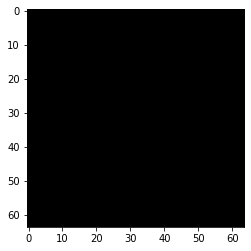

3 0


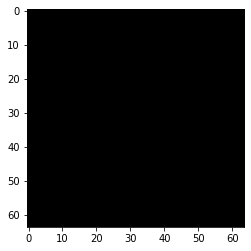

4 0


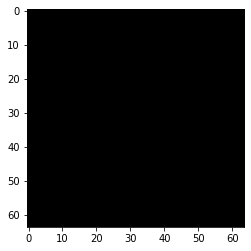

5 0


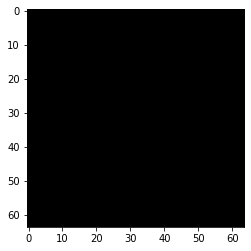

6 11866


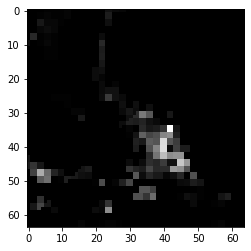

7 6472


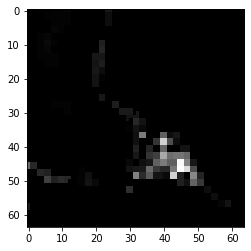

8 3191


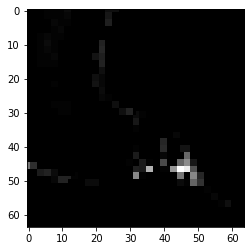

9 608


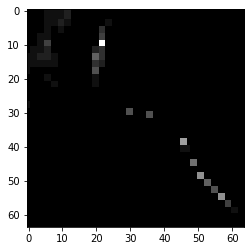

10 372


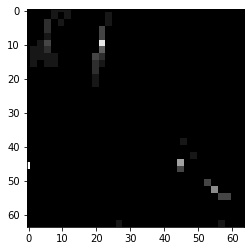

11 2051


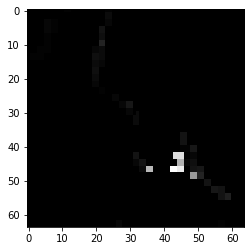

12 43136


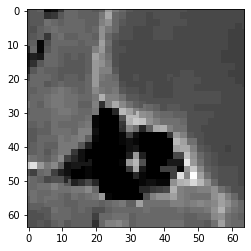

13 334


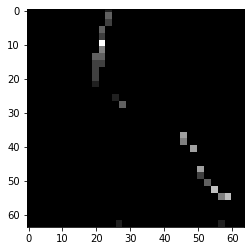

14 464


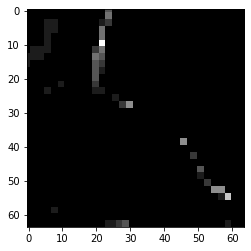

15 746


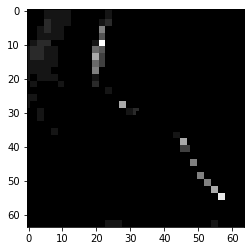

16 3549


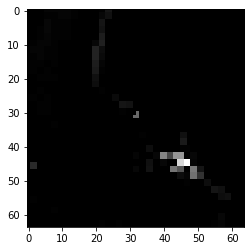

17 5680


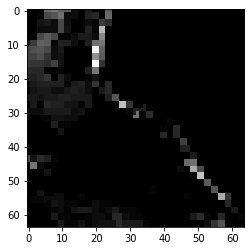

18 0


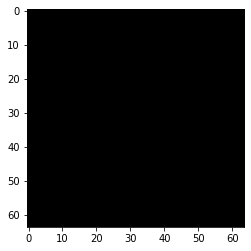

In [ ]:
for i,img in enumerate(CLD) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 


0 0


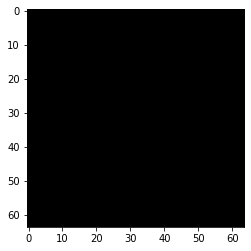

1 0


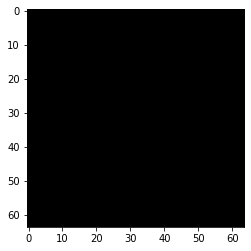

2 0


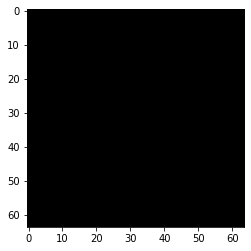

3 0


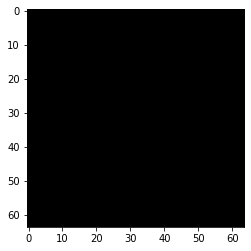

4 0


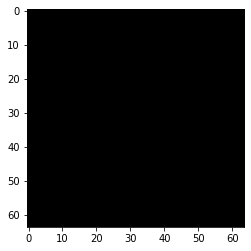

5 0


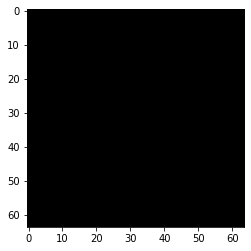

6 0


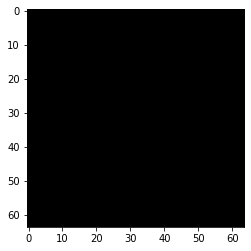

7 0


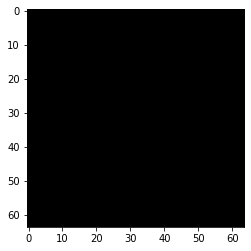

8 0


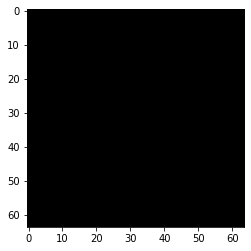

9 0


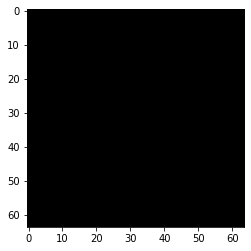

10 0


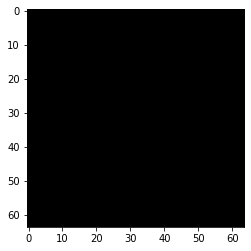

11 0


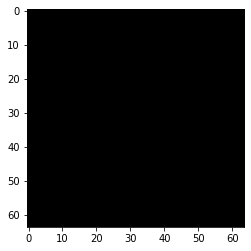

12 3262


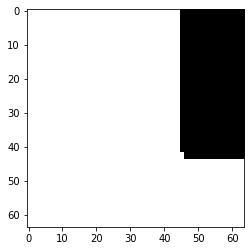

13 0


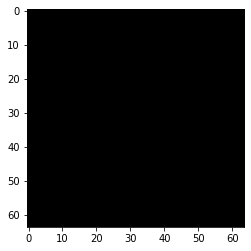

14 0


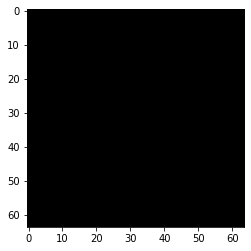

15 0


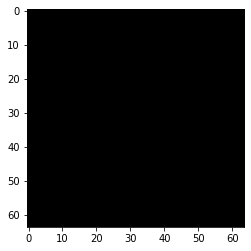

16 0


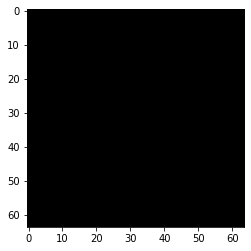

17 0


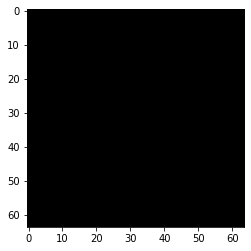

18 0


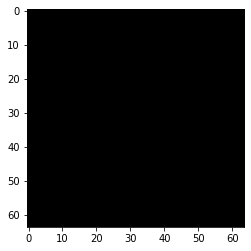

In [ ]:
for i,img in enumerate(CLM) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 


In [ ]:
CLP = np.load('/content/2021-01/ГПН-2013-1/mask/CLP.npy')
print(CLP.shape)

(19, 64, 64, 1)


0 156746


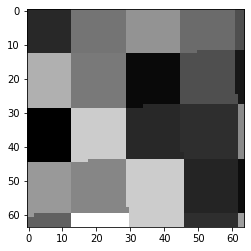

1 284537


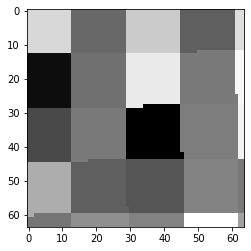

2 7086


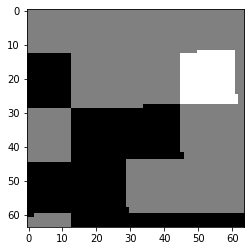

3 36587


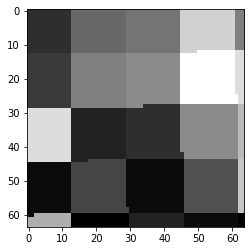

4 6269


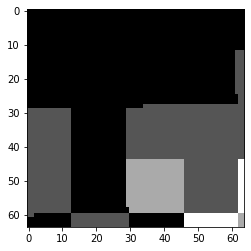

5 12073


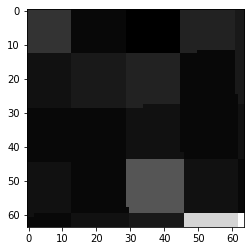

6 73116


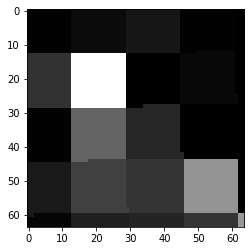

7 66291


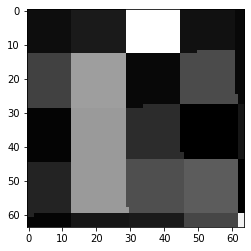

8 49297


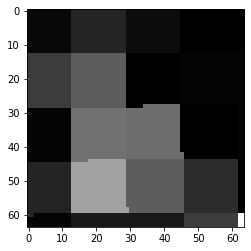

9 71829


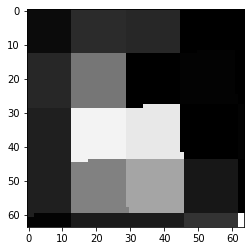

10 35730


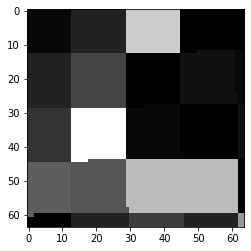

11 44610


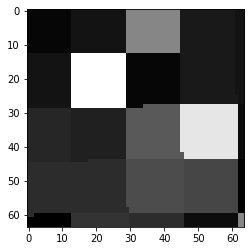

12 394329


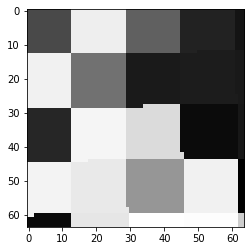

13 73268


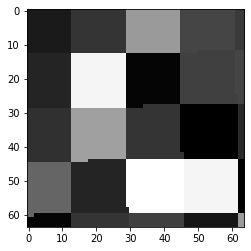

14 72453


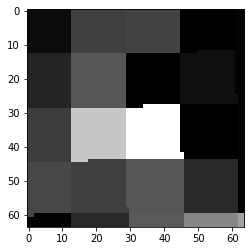

15 79764


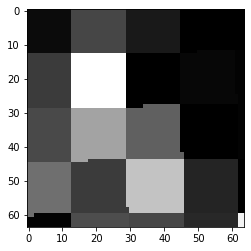

16 68056


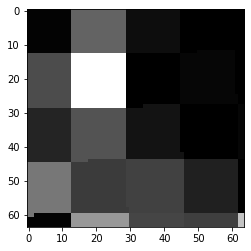

17 187287


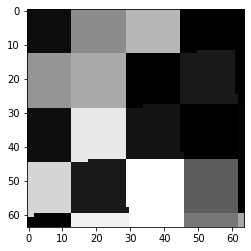

18 38289


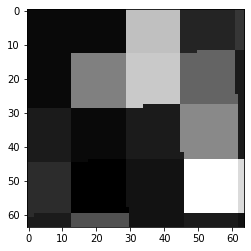

In [ ]:
for i,img in enumerate(CLP) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 4096


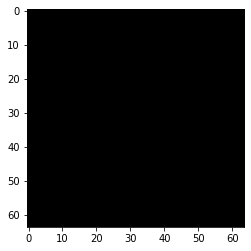

1 4096


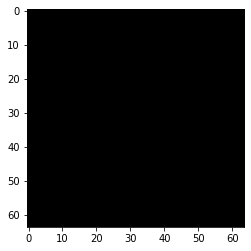

2 4096


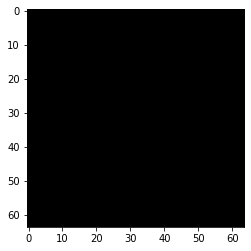

3 4096


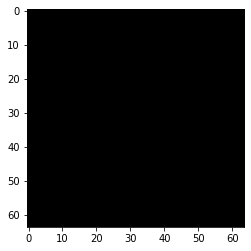

4 4096


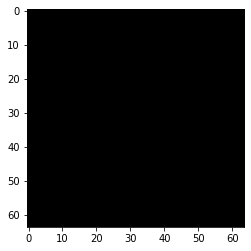

5 4096


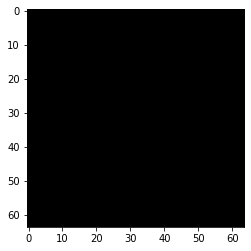

6 4096


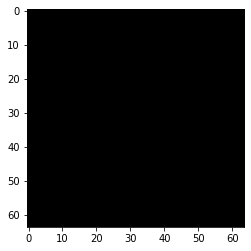

7 4096


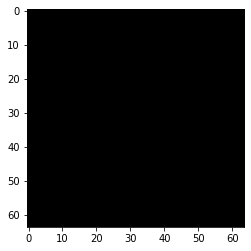

8 4096


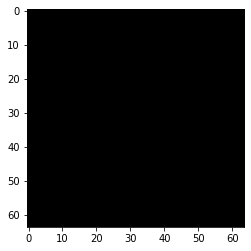

9 4096


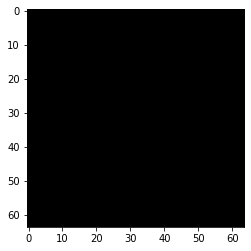

10 4096


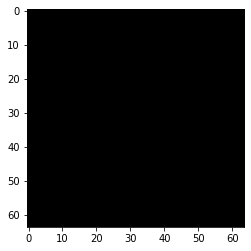

11 4096


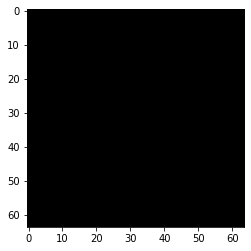

12 4096


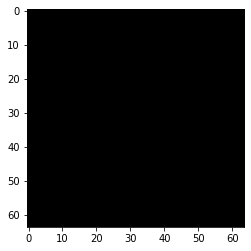

13 4096


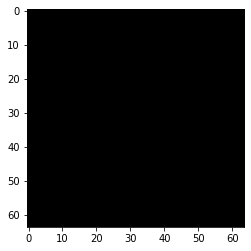

14 4096


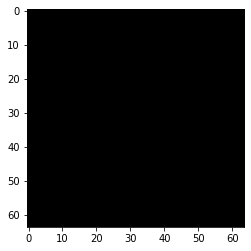

15 4096


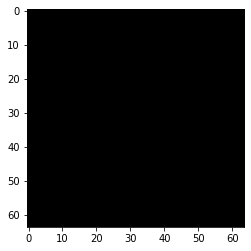

16 4096


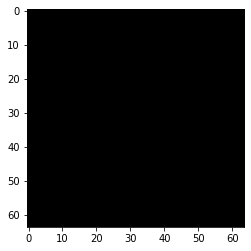

17 4096


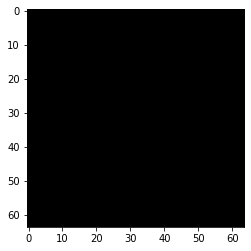

18 4096


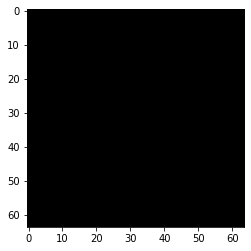

In [ ]:
IS_DATA = np.load('/content/2021-01/ГПН-2013-1/mask/IS_DATA.npy')
print(IS_DATA.shape)
for i,img in enumerate(IS_DATA) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 45056


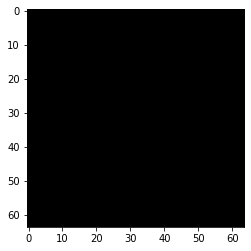

1 45056


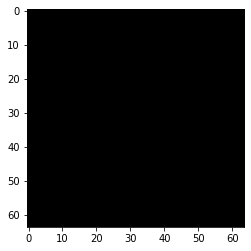

2 45056


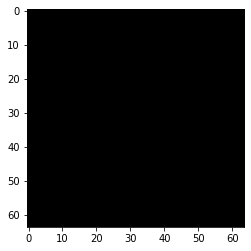

3 45056


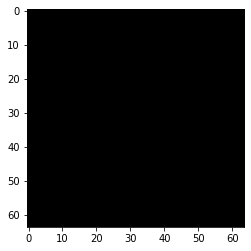

4 45056


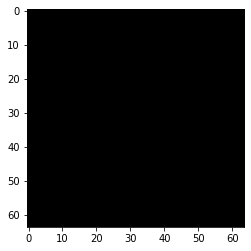

5 45036


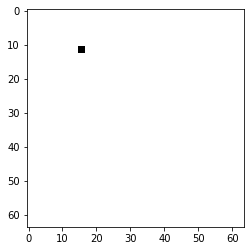

6 24092


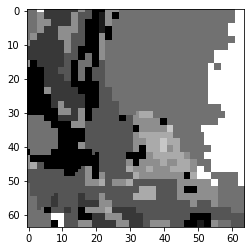

7 21511


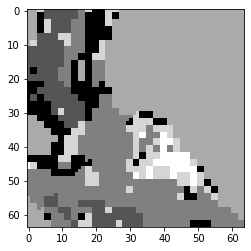

8 21280


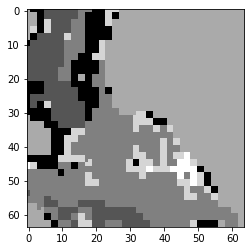

9 20956


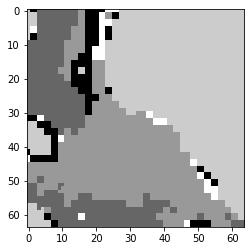

10 20874


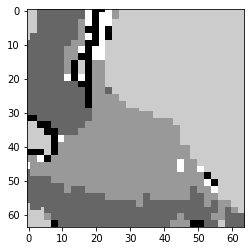

11 20609


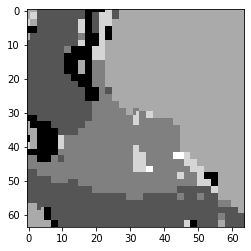

12 33304


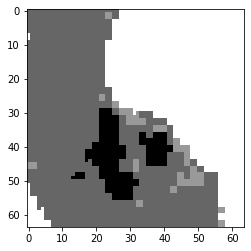

13 20444


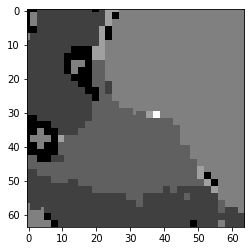

14 20461


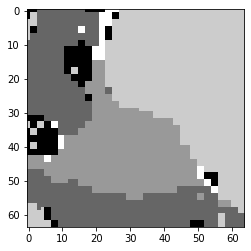

15 20669


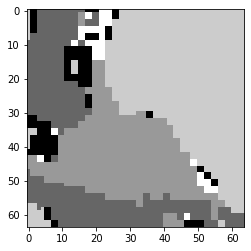

16 21316


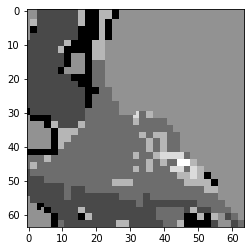

17 24255


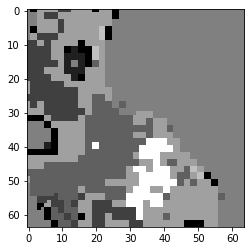

18 45056


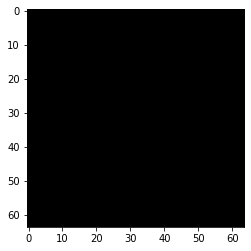

In [ ]:
SCL = np.load('/content/2021-01/ГПН-2013-1/mask/SCL.npy')
print(SCL.shape)
for i,img in enumerate(SCL) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 409600


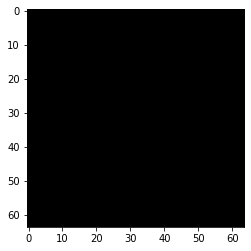

1 409600


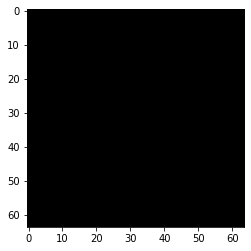

2 409600


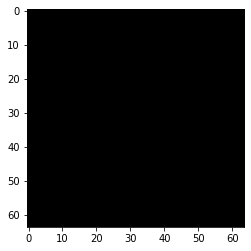

3 409600


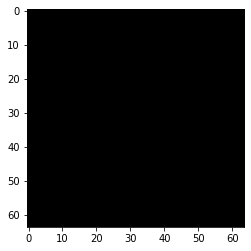

4 409527


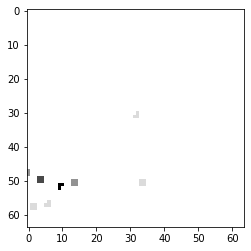

5 387967


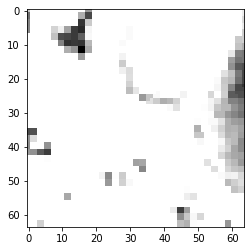

6 16806


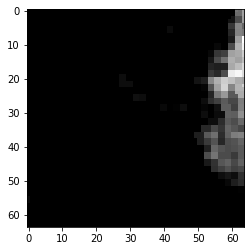

7 0


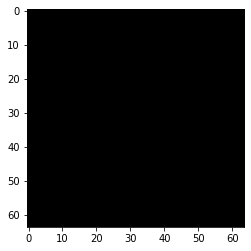

8 0


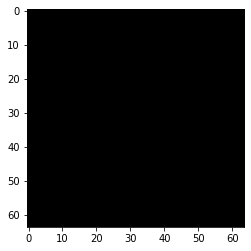

9 0


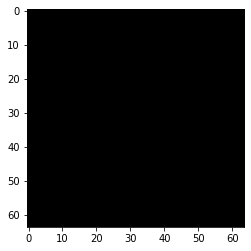

10 0


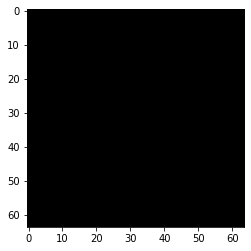

11 0


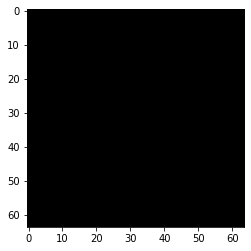

12 0


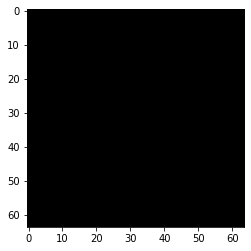

13 0


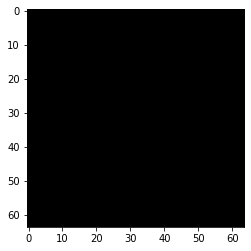

14 0


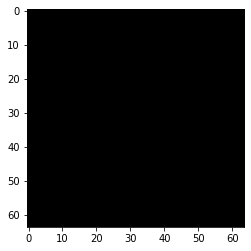

15 0


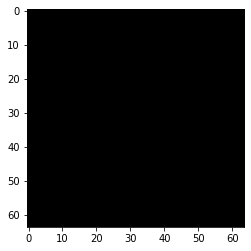

16 0


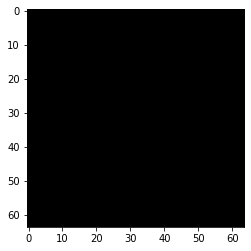

17 0


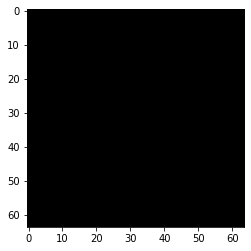

18 400621


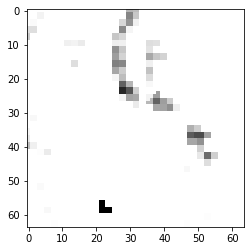

In [ ]:
SNW = np.load('/content/2021-01/ГПН-2013-1/mask/SNW.npy')
print(SNW.shape)
for i,img in enumerate(SNW) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(19, 64, 64, 13)
0 345986.66


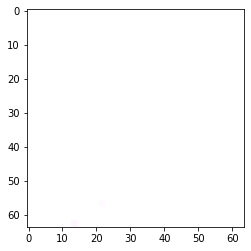

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 347043.8


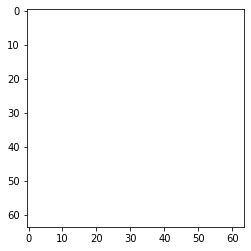

2 382578.78


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


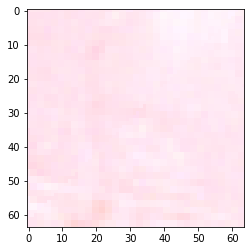

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 321184.5


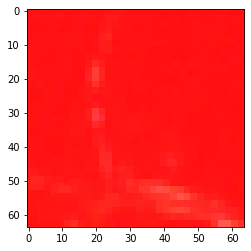

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 312476.3


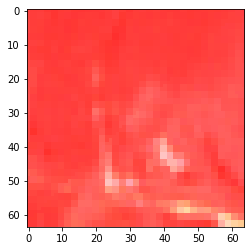

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 241923.97


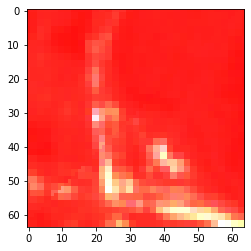

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 64171.79


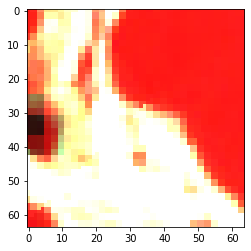

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7 47570.37


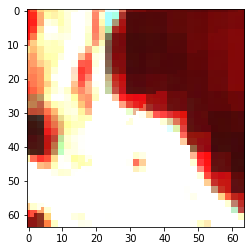

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8 42060.273


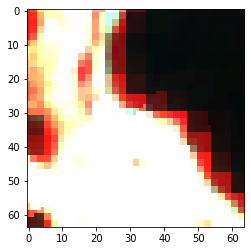

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9 53102.49


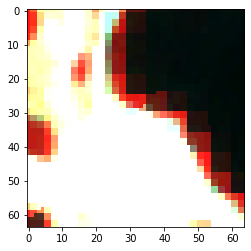

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 53525.832


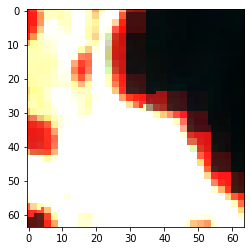

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 49279.37


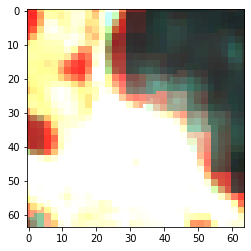

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12 84406.766


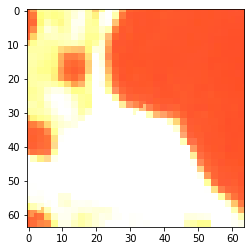

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13 52175.695


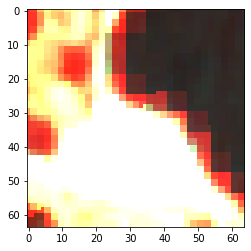

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14 52154.96


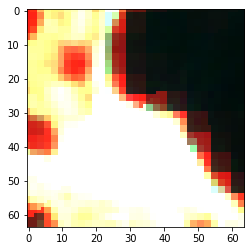

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15 49018.98


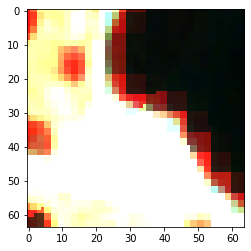

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16 45391.812


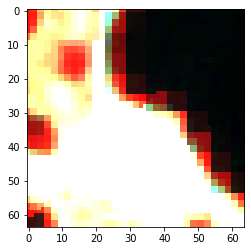

17 50677.367


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


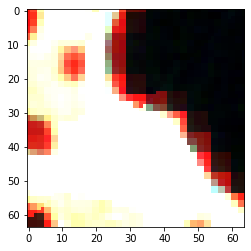

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18 270174.12


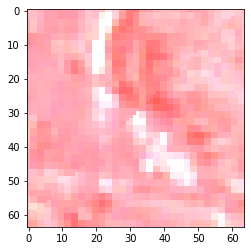

In [ ]:
L2A = np.load('/content/2021-01/ГПН-2013-1/data/L2A.npy')
print(L2A.shape)
for i,img in enumerate(L2A) :
    print(i,img.sum())
    plt.imshow(img[:,:,9:12])
    plt.show() 

In [ ]:
pip install eo-learn

     |████████████████████████████████| 69 kB 4.4 MB/s 
     |████████████████████████████████| 10.5 MB 42.4 MB/s 
     |████████████████████████████████| 133 kB 54.6 MB/s 
     |████████████████████████████████| 1.0 MB 25.8 MB/s 
     |████████████████████████████████| 53.8 MB 222 kB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 15.4 MB 45.6 MB/s 
     |████████████████████████████████| 994 kB 55.7 MB/s 
     |████████████████████████████████| 44 kB 2.2 MB/s 
     |████████████████████████████████| 1.4 MB 34.6 MB/s 
  Created wheel for thunder-registration: filename=thunder_registration-1.0.1-py2.py3-none-any.whl size=5343 sha256=56c732a822c3821ada522e85411bd8122c2483e4d1e0bbbde7ff3cb1a8054f2e
  Stored in directory: /root/.cache/pip/wheels/07/48/ce/71fd2426d1bff16e69c41f8e98bdd08b95a3986369582612ba
  Created wheel for thunder-python: filename=thunder_python-1.4.2-py3-none-any.whl size=43290 sha256=21b365c63b1898e163e42fcc92c931322

In [ ]:
from pathlib import Path
from eolearn.core import EOPatch
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
INPUT_FOLDER =  '/content/drive/MyDrive/Colab Notebooks/ЦП/spills/'

In [ ]:
for file_name in os.listdir(INPUT_FOLDER):
    with zipfile.ZipFile(INPUT_FOLDER + file_name) as zip_ref:
        zip_ref.extractall("spills")

In [ ]:
# reencode all paths in extract_dir
def renamed(dirpath, names, encoding):
    new_names = [old.encode('cp437').decode(encoding) for old in names]
    for old, new in zip(names, new_names):
        os.rename(os.path.join(dirpath, old), os.path.join(dirpath, new))
    return new_names

encoding = 'cp866'
for dirpath, dirs, files in os.walk("spills", topdown=True):
    renamed(dirpath, files, encoding)
    dirs[:] = renamed(dirpath, dirs, encoding)

In [ ]:
d_dir = '/content/spills/'
dct_bbox = []
dct_timestamp = []
bad_files = []
bad_files_timestamp = []
for m_dir in os.listdir(d_dir):
    path = d_dir + m_dir
    for f_dir in os.listdir(path):
        f_path = path +'/' + f_dir
        eopatch = EOPatch.load(f_path, lazy_loading=True)
        try:
            bbox = list(eopatch['bbox'])
            dct = {'dir':m_dir,'name':f_dir,'x1':bbox[0],'y1':bbox[1],'x2':bbox[2],'y2':bbox[3]}
            dct_bbox.append(dct)
        except:
            bad_files.append(f_path)
            continue
        try:
            timestamp = eopatch['timestamp']
            for id,dt_time in enumerate(timestamp):
                dct = {'dir':m_dir,'name':f_dir,'id':id,'date':dt_time}
                dct_timestamp.append(dct)
        except:
            bad_files_timestamp.append(f_path)
            continue

In [ ]:
df_bbox = pd.DataFrame(dct_bbox)
df_bbox

,dir,name,x1,y1,x2,y2
0,2021-14,РН-ЮНГ-ММ-2018-139,72.941261,60.750928,72.952629,60.756850
1,2021-14,РН-ЮНГ-ММ-2018-130,72.785153,60.816755,72.796515,60.822690
2,2021-14,РН-ЮНГ-ММ-2018-17,72.673212,60.858972,72.684567,60.864917
3,2021-14,РН-ЮНГ-ММ-2017-144,72.672401,60.729528,72.683711,60.735472
4,2021-14,РН-ЮНГ-ММ-2020-128,72.877674,60.644536,72.888993,60.650463
...,...,...,...,...,...,...
11003,2021-15,РН-ЮНГ-СРБЛЮ-2016-10,72.549412,60.407856,72.560589,60.413810
11004,2021-15,РН-ЮНГ-ПТ-2019-3,72.000533,60.649778,72.011690,60.655778
11005,2021-15,РН-ЮНГ-ПТ-2017-29,71.947805,60.529759,71.959974,60.535240
11006,2021-15,РН-ЮНГ-ПТ-2016-47,72.015807,60.664501,72.026972,60.670499


In [ ]:
df_timestamp = pd.DataFrame(dct_timestamp)
df_timestamp

,dir,name,id,date
0,2021-14,РН-ЮНГ-ММ-2018-139,0,2021-02-04 06:42:18+00:00
1,2021-14,РН-ЮНГ-ММ-2018-139,1,2021-03-26 06:42:17+00:00
2,2021-14,РН-ЮНГ-ММ-2018-139,2,2021-04-12 06:32:17+00:00
3,2021-14,РН-ЮНГ-ММ-2018-139,3,2021-05-10 06:42:18+00:00
4,2021-14,РН-ЮНГ-ММ-2018-139,4,2021-05-22 06:32:20+00:00
...,...,...,...,...
139799,2021-15,РН-ЮНГ-ПРЗ-2018-29,13,2021-09-30 06:52:21+00:00
139800,2021-15,РН-ЮНГ-ПРЗ-2018-29,14,2021-10-25 06:52:18+00:00
139801,2021-15,РН-ЮНГ-ПРЗ-2018-29,15,2021-10-27 06:42:25+00:00
139802,2021-15,РН-ЮНГ-ПРЗ-2018-29,16,2021-10-30 06:52:21+00:00


In [ ]:
print(len(bad_files))
print(len(bad_files_timestamp))

92
901


In [ ]:
df_bbox.to_csv('bbox_2021.csv')
df_timestamp.to_csv('timestamp_2021.csv')

In [ ]:
pd.DataFrame(bad_files).to_csv('no_bbox_2021.csv')
pd.DataFrame(bad_files_timestamp).to_csv('no_timestamp_2021.csv')

In [ ]:
obj = pd.read_pickle('/content/spills/2021-03/РН-СНГ-2013-3788/bbox.pkl')
obj

BBox(((74.44956331395248, 63.02904804600002), (74.46210459688555, 63.03484056516876)), crs=CRS('4326'))

In [ ]:
obj = pd.read_pickle('/content/2021-01/ГПН-2013-1/timestamp.pkl')
len(obj)

19

In [ ]:
obj

[datetime.datetime(2021, 2, 12, 6, 51, 41, tzinfo=tzlocal()),
 datetime.datetime(2021, 2, 17, 6, 51, 40, tzinfo=tzlocal()),
 datetime.datetime(2021, 3, 29, 6, 51, 37, tzinfo=tzlocal()),
 datetime.datetime(2021, 4, 12, 6, 31, 44, tzinfo=tzlocal()),
 datetime.datetime(2021, 4, 23, 6, 51, 38, tzinfo=tzlocal()),
 datetime.datetime(2021, 4, 25, 6, 41, 40, tzinfo=tzlocal()),
 datetime.datetime(2021, 5, 10, 6, 41, 45, tzinfo=tzlocal()),
 datetime.datetime(2021, 5, 12, 6, 31, 46, tzinfo=tzlocal()),
 datetime.datetime(2021, 5, 22, 6, 31, 48, tzinfo=tzlocal()),
 datetime.datetime(2021, 6, 14, 6, 41, 46, tzinfo=tzlocal()),
 datetime.datetime(2021, 6, 26, 6, 31, 49, tzinfo=tzlocal()),
 datetime.datetime(2021, 7, 2, 6, 51, 44, tzinfo=tzlocal()),
 datetime.datetime(2021, 8, 6, 6, 51, 43, tzinfo=tzlocal()),
 datetime.datetime(2021, 8, 11, 6, 51, 45, tzinfo=tzlocal()),
 datetime.datetime(2021, 8, 21, 6, 51, 44, tzinfo=tzlocal()),
 datetime.datetime(2021, 9, 15, 6, 51, 38, tzinfo=tzlocal()),
 datetime.

In [ ]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadTask, SaveTask, EOExecutor, ExtractBandsTask, MergeFeatureTask
from eolearn.io import SentinelHubInputTask, VectorImportTask, ExportToTiffTask
from eolearn.mask import AddValidDataMaskTask
from eolearn.geometry import VectorToRasterTask, PointSamplingTask, ErosionTask
from eolearn.features import LinearInterpolationTask, SimpleFilterTask, NormalizedDifferenceIndexTask

ModuleNotFoundError: ignored

In [ ]:
obj = pd.read_pickle('/content/2021-01/ГПН-2013-1/meta_info.pkl')
obj

ModuleNotFoundError: ignored

##Bbox


In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU'),None,False)
df = pd.read_csv(file_name,index_col=0)
df

Downloading...
From: https://drive.google.com/uc?id=1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU
To: /content/clean_pollution.csv
100%|██████████| 1.72M/1.72M [00:00<00:00, 8.29MB/s]


,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,73.506833,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,73.508194,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,73.347778,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.742867,61.166608,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.885611,61.310111,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.865905,61.355532,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,77.539306,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9'),None,False)
df_bbox = pd.read_csv(file_name,index_col=0)
df_bbox

Downloading...
From: https://drive.google.com/uc?id=1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9
To: /content/bbox_2021.csv
100%|██████████| 1.18M/1.18M [00:00<00:00, 7.32MB/s]


,dir,name,x1,y1,x2,y2
0,2021-14,РН-ЮНГ-ММ-2018-139,72.941261,60.750928,72.952629,60.756850
1,2021-14,РН-ЮНГ-ММ-2018-130,72.785153,60.816755,72.796515,60.822690
2,2021-14,РН-ЮНГ-ММ-2018-17,72.673212,60.858972,72.684567,60.864917
3,2021-14,РН-ЮНГ-ММ-2017-144,72.672401,60.729528,72.683711,60.735472
4,2021-14,РН-ЮНГ-ММ-2020-128,72.877674,60.644536,72.888993,60.650463
...,...,...,...,...,...,...
11003,2021-15,РН-ЮНГ-СРБЛЮ-2016-10,72.549412,60.407856,72.560589,60.413810
11004,2021-15,РН-ЮНГ-ПТ-2019-3,72.000533,60.649778,72.011690,60.655778
11005,2021-15,РН-ЮНГ-ПТ-2017-29,71.947805,60.529759,71.959974,60.535240
11006,2021-15,РН-ЮНГ-ПТ-2016-47,72.015807,60.664501,72.026972,60.670499


In [ ]:
idx = []
idx_no_pol = []
dirs = []
for i in range(df.shape[0]):
    row = df.loc[i]
    mask = (row.lat > df_bbox.x1) & (row.lat < df_bbox.x2) & (row.lon > df_bbox.y1) & (row.lon < df_bbox.y2)
    tmp = df_bbox.loc[mask]
    if len(tmp)<1:
        idx_no_pol.append(i)
    else:
        for id in tmp.index:
            idx.append(id)
            dirs.append(tmp.loc[id,'dir'])

In [ ]:
df.loc[idx_no_pol]

,cat_pollution,lat,lon,date,cat_ground,square
20,"Нефть, нефтепродукты",76.121283,62.083820,2019-03-29 00:00:00,земли лесного фонда,0.0726
21,"Нефть, нефтепродукты",76.121874,62.084043,2019-03-29 00:00:00,земли лесного фонда,0.1013
22,"Нефть, нефтепродукты",76.121199,62.083993,2019-03-29 00:00:00,земли лесного фонда,0.0059
23,"Нефть, нефтепродукты",76.120363,62.083883,2019-03-29 00:00:00,земли лесного фонда,0.0964
24,"Нефть, нефтепродукты",76.120294,62.084116,2019-03-29 00:00:00,земли лесного фонда,0.2082
...,...,...,...,...,...,...
11805,нефть,77.742538,61.162481,2021-02-18 00:00:00,земли лесного фонда,0.0934
11806,нефть,77.740168,61.185918,2021-02-18 00:00:00,земли лесного фонда,2.0070
11808,нефть,77.885611,61.310111,2019-03-29 00:00:00,земли лесного фонда,0.0001
11810,нефтепродукты,77.539306,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
!curl --output '2020-01.zip' 'https://s791sas.storage.yandex.net/rdisk/4e640441b61735ef9b488a02214150215adb571e073492d296cffdaa1ccfae5c/61a9e18d/NR5L2t6eefLT-uMG4mc5DQKaa2QMnKdMcikGu-rTLQpD33G9y5IF1IVTQkDqO8EXsWbOm9O0H5M_Qr4_JSFwRQ==?uid=0&filename=2020-01.zip&disposition=attachment&hash=GpBit%2FOoLZ5yecw7KZz1Ouq%2F8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%2F%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9%2Feo-learn-patches%2Fsentinel2-l2a%2F64x64-10%2F2020%2F2020-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=791944014&hid=e2e732fd73c0d7a07574746bb3998055&media_type=compressed&tknv=v2&rtoken=mBSGufAoCPKy&force_default=no&ycrid=na-fd8c592ee566594491549902098328bb-downloader21h&ts=5d23a6de1bd40&s=df61f88a42e896bc7cec60693f9a4b91e61c92df35aa9bbb6706b58475069b43&pb=U2FsdGVkX1-vBG6Vr_ZLpBmZhiMrn6-UcoEc_AXlLTeDZXg9oh_50hWzj1IvWv_MaAMDeybOm17QgvHXNtK2bWnbY-XayE8Jg-sstynJ9yY'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755M  100  755M    0     0  14.8M      0  0:00:50  0:00:50 --:--:-- 16.0M
